In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("House_Rent_Dataset.csv")

####Dataset Glossary

BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Rent of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [4]:
df.head()

Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contact Owner

In [5]:
df.shape

(4746, 12)

#EDA

In [6]:
df.info()
#the dataset contains both numerical and categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


**Numerical Columns :** BHK, Rent, Size, bathroom

**Categorical Columns :** Posted On, Floor, Area Locality, City, Furnishing Status, Tenant Preferred, Point of Contact

In [7]:
print(df.describe())

               BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3.300000e+04  1200.000000     2.000000
max       6.000000  3.500000e+06  8000.000000    10.000000


**Inference :** BHK and Bathroom follows normal distribution

####Data Cleaning

In [8]:
df.nunique()

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64

In [9]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [10]:
df.duplicated().sum()

0

####Visualization

<ipython-input-11-7a733340a108>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


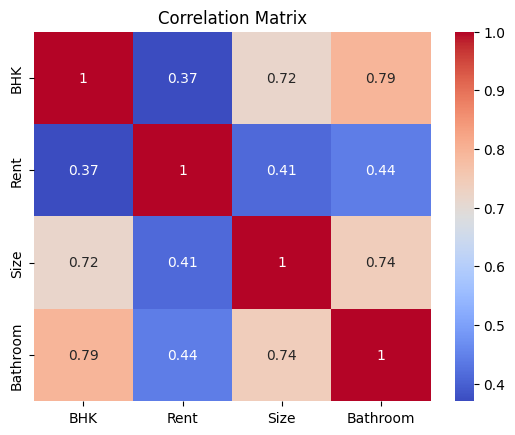

In [11]:
#correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- *all the values are positive*
- *it shows strong correlation of all the parameters*

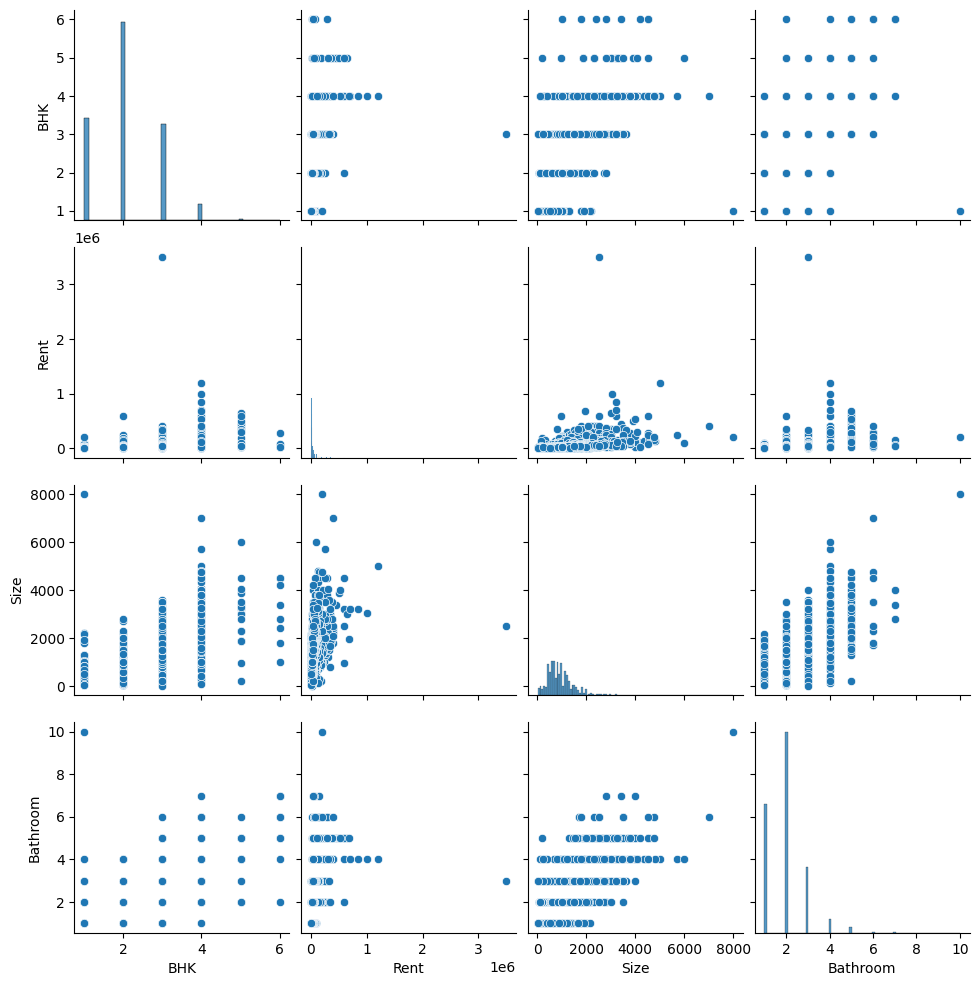

In [12]:
#pairplot
sns.pairplot(df)
plt.show()

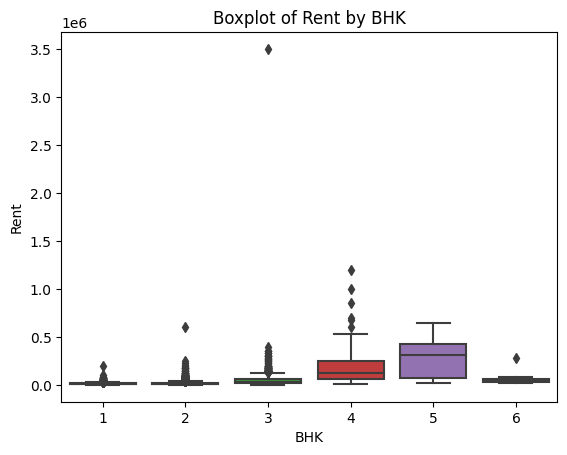

In [13]:
sns.boxplot(x='BHK', y='Rent', data=df)
plt.title('Boxplot of Rent by BHK')
plt.show()

Rents for 5BHK among all the 6 types is highest

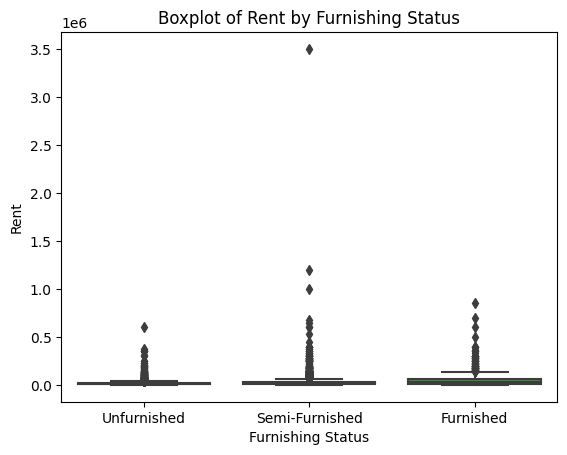

In [14]:
sns.boxplot(x='Furnishing Status', y='Rent', data=df)
plt.title('Boxplot of Rent by Furnishing Status')
plt.show()

<ipython-input-15-bec5abd23f7b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="BHK", y="Rent", hue="Furnishing Status", ci=None)


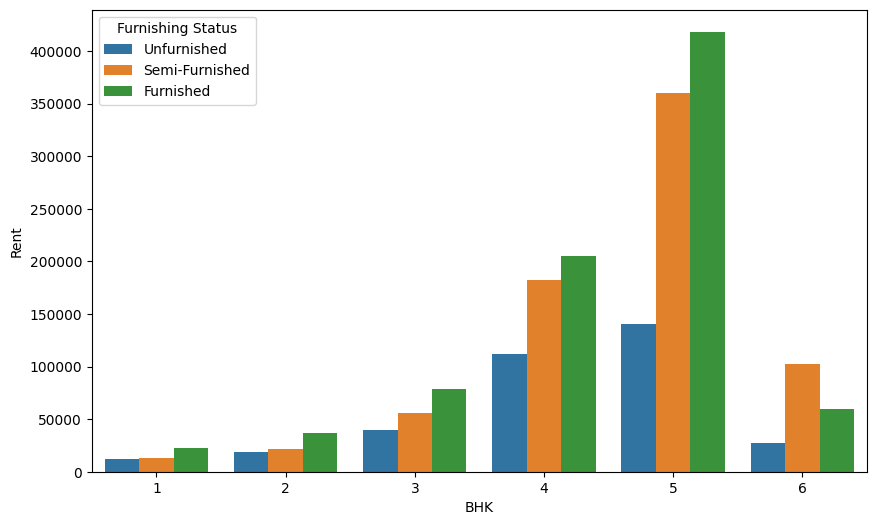

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="BHK", y="Rent", hue="Furnishing Status", ci=None)
plt.show()


- Rents for 5BHK among all the BHK types is highest.
- Furnished houses generally have more rent demand

<ipython-input-16-83d627131c74>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="City", y="Rent", hue="Tenant Preferred", ci=None)


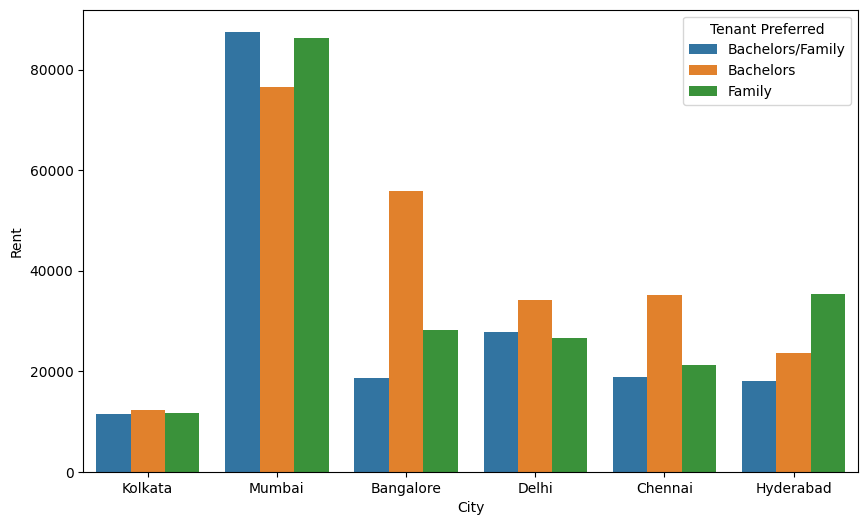

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="City", y="Rent", hue="Tenant Preferred", ci=None)
plt.show()

- Mumbai is observed to have a significantly higher demand of rent
- Mostly Bachelors need to pay higher rents in all the mentioned cities

In [17]:
df["Area Type"].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

<ipython-input-18-b86211d1753d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Bathroom", y="Rent", hue="Area Type", ci=None)


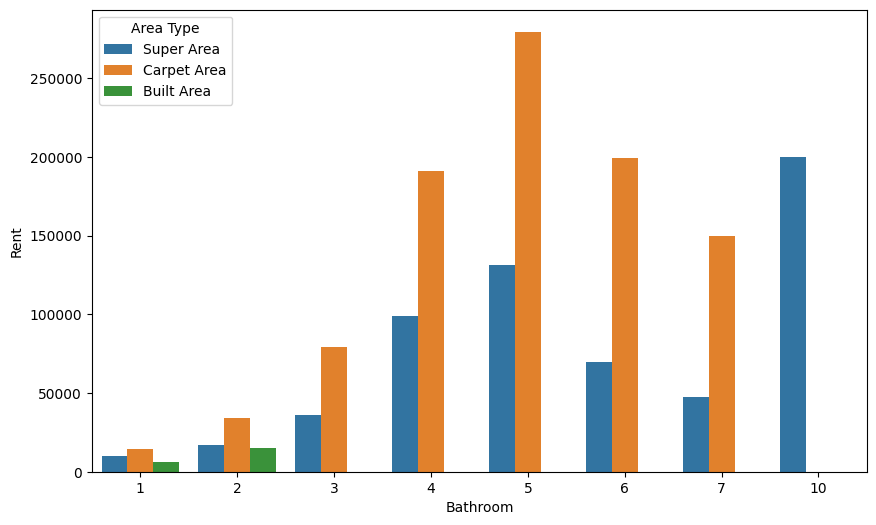

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Bathroom", y="Rent", hue="Area Type", ci=None)
plt.show()

- Carpet Area is seen to have higher rates

###Model Building


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import LabelEncoder


##### Transformation


In [20]:
df.nunique()

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64

- Area Locality has highest unique values.

In [21]:
# 1. One-Hot Encoder for 'Floor'
#'Floor' column is ordinal and have a meaningful order
df = pd.get_dummies(df, columns=['Floor'], prefix='Floor')

In [22]:

df['Current_Floor'] = df['Floor'].str.extract('(\d+) out of \d+').astype(float)
df['Total_Floors'] = df['Floor'].str.extract('\d+ out of (\d+)').astype(float)

print(df)


KeyError: ignored

In [ ]:
print(df.head())

In [ ]:
# 2. all are Nominal columns except Floor.
# Label encoding is suitable in Nominal categories
label_encoder = LabelEncoder()

df['Area Type'] = label_encoder.fit_transform(df['Area Type'])
df['Area Locality'] = label_encoder.fit_transform(df['Area Locality'])
df['City'] = label_encoder.fit_transform(df['City'])
df['Furnishing Status'] = label_encoder.fit_transform(df['Furnishing Status'])
df['Tenant Preferred'] = label_encoder.fit_transform(df['Tenant Preferred'])
df['Point of Contact'] = label_encoder.fit_transform(df['Point of Contact'])

In [ ]:
print(df.info())

In [ ]:
print(df.head())

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop(['Posted On', 'Rent'], axis=1)
y = df['Rent']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Using a fixed seed, i.e random_state parameter makes our results consistent across runs. We get same training/testing splits each time you run the code.


In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')